In [10]:
!pip install numpy opencv-python-headless matplotlib scikit-learn
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [11]:
!wget https://dicom5c.blob.core.windows.net/public/Data.zip -O /content/Data.zip
!unzip -o /content/Data.zip -d /content/dataset
!ls /content/dataset  # Check the contents of the unzipped directory


Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/__MACOSX/Data/TCGA_DU_5855_19951217/._TCGA_DU_5855_19951217_1_mask.tif  
  inflating: /content/dataset/Data/TCGA_DU_5855_19951217/TCGA_DU_5855_19951217_17_mask.tif  
  inflating: /content/dataset/__MACOSX/Data/TCGA_DU_5855_19951217/._TCGA_DU_5855_19951217_17_mask.tif  
  inflating: /content/dataset/Data/TCGA_DU_5855_19951217/TCGA_DU_5855_19951217_16_mask.tif  
  inflating: /content/dataset/__MACOSX/Data/TCGA_DU_5855_19951217/._TCGA_DU_5855_19951217_16_mask.tif  
  inflating: /content/dataset/Data/TCGA_DU_5855_19951217/TCGA_DU_5855_19951217_24_mask.tif  
  inflating: /content/dataset/__MACOSX/Data/TCGA_DU_5855_19951217/._TCGA_DU_5855_19951217_24_mask.tif  
  inflating: /content/dataset/Data/TCGA_DU_5855_19951217/TCGA_DU_5855_19951217_25_mask.tif  
  inflating: /content/dataset/__MACOSX/Data/TCGA_DU_5855_19951217/._TCGA_DU_5855_19951217_25_mask.tif  
  inflating: /content/dataset/Data/TCGA_DU_5855_19951217/T

In [14]:
!unzip -l /content/Data.zip  # This will list the contents of the zip file without extracting it


Streaming output truncated to the last 5000 lines.
    65746  2019-10-22 17:36   Data/TCGA_DU_5855_19951217/TCGA_DU_5855_19951217_17_mask.tif
      173  2019-10-22 17:36   __MACOSX/Data/TCGA_DU_5855_19951217/._TCGA_DU_5855_19951217_17_mask.tif
    65746  2019-10-22 17:36   Data/TCGA_DU_5855_19951217/TCGA_DU_5855_19951217_16_mask.tif
      173  2019-10-22 17:36   __MACOSX/Data/TCGA_DU_5855_19951217/._TCGA_DU_5855_19951217_16_mask.tif
    65746  2019-10-22 17:36   Data/TCGA_DU_5855_19951217/TCGA_DU_5855_19951217_24_mask.tif
      173  2019-10-22 17:36   __MACOSX/Data/TCGA_DU_5855_19951217/._TCGA_DU_5855_19951217_24_mask.tif
    65746  2019-10-22 17:36   Data/TCGA_DU_5855_19951217/TCGA_DU_5855_19951217_25_mask.tif
      173  2019-10-22 17:36   __MACOSX/Data/TCGA_DU_5855_19951217/._TCGA_DU_5855_19951217_25_mask.tif
   203102  2019-10-22 17:36   Data/TCGA_DU_5855_19951217/TCGA_DU_5855_19951217_11.tif
      173  2019-10-22 17:36   __MACOSX/Data/TCGA_DU_5855_19951217/._TCGA_DU_5855_19951217_1

In [15]:
# List files in the dataset directory to check their structure
!ls /content/dataset
!find /content/dataset -type f  # This helps in finding all files, showing their full paths


Streaming output truncated to the last 5000 lines.
/content/dataset/Data/TCGA_DU_6399_19830416/TCGA_DU_6399_19830416_4.tif
/content/dataset/Data/TCGA_DU_6399_19830416/TCGA_DU_6399_19830416_4_mask.tif
/content/dataset/Data/TCGA_DU_6399_19830416/TCGA_DU_6399_19830416_9_mask.tif
/content/dataset/Data/TCGA_DU_6399_19830416/TCGA_DU_6399_19830416_39_mask.tif
/content/dataset/Data/TCGA_DU_6399_19830416/TCGA_DU_6399_19830416_1.tif
/content/dataset/Data/TCGA_DU_6399_19830416/TCGA_DU_6399_19830416_26_mask.tif
/content/dataset/Data/TCGA_DU_6399_19830416/TCGA_DU_6399_19830416_18_mask.tif
/content/dataset/Data/TCGA_DU_6399_19830416/TCGA_DU_6399_19830416_1_mask.tif
/content/dataset/Data/TCGA_DU_6399_19830416/TCGA_DU_6399_19830416_22.tif
/content/dataset/Data/TCGA_DU_6399_19830416/TCGA_DU_6399_19830416_25.tif
/content/dataset/Data/TCGA_DU_6399_19830416/TCGA_DU_6399_19830416_32.tif
/content/dataset/Data/TCGA_DU_6399_19830416/TCGA_DU_6399_19830416_24.tif
/content/dataset/Data/TCGA_DU_6399_19830416/TCGA

In [17]:
import os
import cv2
import matplotlib.pyplot as plt

# Define the root directory containing your dataset
root_dir = '/content/dataset/Data'

# Create lists to hold the paths of images and their corresponding masks
images = []
masks = []

# Walk through the directory structure
for subdir, dirs, files in os.walk(root_dir):
    for file in files:
        filepath = os.path.join(subdir, file)
        if '_mask.tif' in file:
            masks.append(filepath)
        elif '.tif' in file:
            images.append(filepath)

# Sort to maintain alignment (assuming filenames are aligned properly)
images.sort()
masks.sort()

print(f"Total images found: {len(images)}")
print(f"Total masks found: {len(masks)}")


Total images found: 3929
Total masks found: 3929


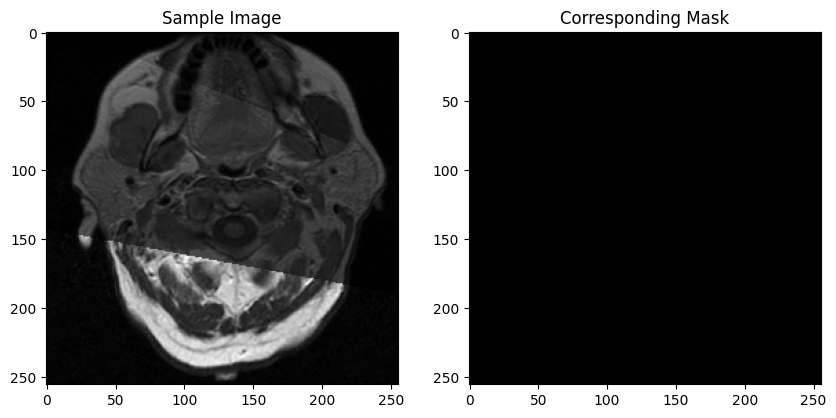

In [18]:
if images and masks:
    # Read an image and its corresponding mask
    img = cv2.imread(images[0], cv2.IMREAD_GRAYSCALE)
    msk = cv2.imread(masks[0], cv2.IMREAD_GRAYSCALE)

    # Display the images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Sample Image')
    plt.subplot(1, 2, 2)
    plt.imshow(msk, cmap='gray')
    plt.title('Corresponding Mask')
    plt.show()
else:
    print("No images or masks to display.")


In [19]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets with a 20% test size
train_images, test_images, train_masks, test_masks = train_test_split(images, masks, test_size=0.20, random_state=42)

print(f"Number of training images: {len(train_images)}")
print(f"Number of testing images: {len(test_images)}")


Number of training images: 3143
Number of testing images: 786


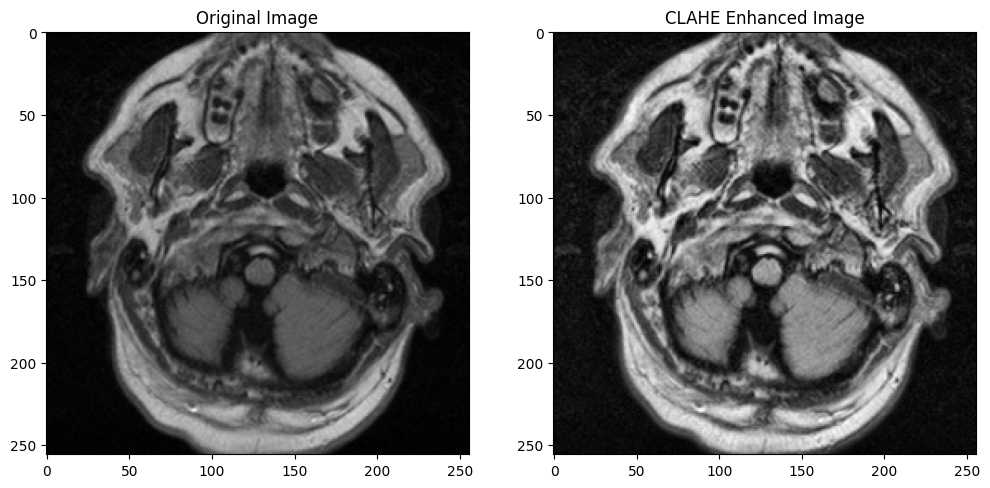

In [20]:
def apply_clahe(image_path):
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Unable to read the image at path: {image_path}")

    # Create a CLAHE object (with parameters tailored to your needs)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    return clahe.apply(image)

# Apply CLAHE to a sample image and visualize the enhancement
sample_image_path = train_images[0]
enhanced_image = apply_clahe(sample_image_path)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.imread(sample_image_path, cv2.IMREAD_GRAYSCALE), cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(enhanced_image, cmap='gray')
plt.title('CLAHE Enhanced Image')
plt.show()


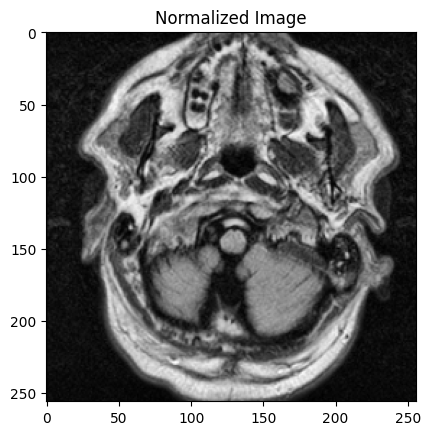

In [21]:
def normalize(image):
    return (image - np.min(image)) / (np.max(image) - np.min(image))

# Load, enhance, and normalize a sample image
img = apply_clahe(train_images[0])
normalized_image = normalize(img)

plt.figure()
plt.imshow(normalized_image, cmap='gray')
plt.title('Normalized Image')
plt.show()


In [22]:
# Example: saving one processed image and mask; extend this to all images as needed
cv2.imwrite('/content/processed_train_images/0.tif', enhanced_image)


False

In [23]:
!pip install tensorflow

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Activation, Add
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanIoU


In [24]:
def conv_block(input_tensor, num_filters):
    encoder = Conv2D(num_filters, (3, 3), padding='same')(input_tensor)
    encoder = Activation('relu')(encoder)
    encoder = BatchNormalization()(encoder)
    encoder = Conv2D(num_filters, (3, 3), padding='same')(encoder)
    encoder = Activation('relu')(encoder)
    encoder = BatchNormalization()(encoder)
    return encoder

def decoder_block(input_tensor, concat_tensor, num_filters):
    decoder = Conv2DTranspose(num_filters, (2, 2), strides=(2, 2), padding='same')(input_tensor)
    decoder = concatenate([decoder, concat_tensor], axis=-1)
    decoder = BatchNormalization()(decoder)
    decoder = Activation('relu')(decoder)
    decoder = Conv2D(num_filters, (3, 3), padding='same')(decoder)
    decoder = Activation('relu')(decoder)
    decoder = BatchNormalization()(decoder)
    decoder = Conv2D(num_filters, (3, 3), padding='same')(decoder)
    decoder = Activation('relu')(decoder)
    decoder = BatchNormalization()(decoder)
    return decoder

def nested_unet(input_size=(256, 256, 1), num_classes=1):
    inputs = Input(input_size)

    # Encoding path
    e1 = conv_block(inputs, 32)
    e2 = conv_block(MaxPooling2D((2, 2))(e1), 64)
    e3 = conv_block(MaxPooling2D((2, 2))(e2), 128)
    e4 = conv_block(MaxPooling2D((2, 2))(e3), 256)

    # Bridge
    b = conv_block(MaxPooling2D((2, 2))(e4), 512)

    # Decoding path
    d4 = decoder_block(b, e4, 256)
    d3 = decoder_block(d4, e3, 128)
    d2 = decoder_block(d3, e2, 64)
    d1 = decoder_block(d2, e1, 32)

    # Output
    outputs = Conv2D(num_classes, (1, 1), activation='sigmoid')(d1)

    model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    return model


In [25]:
# Placeholder for Attention U-Net; Implement similar to Nested U-Net with attention mechanisms added to gating signals

def attention_gate(input_tensor, gating_tensor, num_filters):
    # Implement an attention gate here, which filters the gating tensor based on the input tensor
    pass  # Placeholder for implementation

# Build the full model incorporating attention gates in the U-Net architecture
def attention_unet(input_size=(256, 256, 1), num_classes=1):
    # Placeholder for Attention U-Net model building
    pass  # Placeholder for implementation


In [26]:
# Placeholder for setting up training using model.fit(), possibly involving data generators if the dataset is large

def train_model(model, train_data, validation_data, epochs=25):
    model_history = model.fit(train_data, epochs=epochs, validation_data=validation_data)
    return model_history


In [27]:
def attention_block(x, g, inter_channel):
    # x - input features
    # g - gating signal
    # inter_channel - number of inter channels
    theta_x = Conv2D(inter_channel, kernel_size=(2, 2), strides=(2, 2), padding='same')(x)
    phi_g = Conv2D(inter_channel, kernel_size=(1, 1), strides=(1, 1), padding='same')(g)

    concat_xg = Add()([theta_x, phi_g])
    act_xg = Activation('relu')(concat_xg)
    psi = Conv2D(1, kernel_size=(1, 1), strides=(1, 1), padding='same')(act_xg)
    sigmoid_xg = Activation('sigmoid')(psi)
    shape_sigmoid = int(sigmoid_xg.shape[1])
    upsample_psi = UpSampling2D(size=(shape_sigmoid // int(x.shape[1]), shape_sigmoid // int(x.shape[2])))(sigmoid_xg)

    y = multiply([upsample_psi, x])
    result = Conv2D(inter_channel, kernel_size=(1, 1), strides=(1, 1), padding='same')(y)
    result_bn = BatchNormalization()(result)
    return result_bn

def attention_unet(input_size=(256, 256, 1), num_classes=1):
    inputs = Input(input_size)

    # Downsampling
    c1 = conv_block(inputs, 32)
    p1 = MaxPooling2D((2, 2))(c1)
    c2 = conv_block(p1, 64)
    p2 = MaxPooling2D((2, 2))(c2)

    # Bottleneck
    bn = conv_block(p2, 128)

    # Upsampling with attention
    attn1 = attention_block(c2, bn, 64)
    up1 = UpSampling2D((2, 2))(bn)
    concat1 = concatenate([up1, attn1])
    c3 = conv_block(concat1, 64)

    attn2 = attention_block(c1, c3, 32)
    up2 = UpSampling2D((2, 2))(c3)
    concat2 = concatenate([up2, attn2])
    c4 = conv_block(concat2, 32)

    # Output layer
    outputs = Conv2D(num_classes, (1, 1), activation='sigmoid')(c4)

    model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model


In [29]:
import numpy as np
import cv2

# Function to load images from file paths
def load_images(image_paths):
    images = [cv2.imread(path, cv2.IMREAD_GRAYSCALE) for path in image_paths]
    return np.array(images)

# Convert file paths to arrays
train_images = load_images(train_images)
train_masks = load_images(train_masks)

# Verify shapes
print(f'Train Images Shape: {train_images.shape}')
print(f'Train Masks Shape: {train_masks.shape}')


Train Images Shape: (3143, 256, 256)
Train Masks Shape: (3143, 256, 256)


In [30]:
# Assuming model input requires single channel images of shape (256, 256, 1)
train_images = np.expand_dims(train_images, axis=-1)  # Add channel dimension
train_masks = np.expand_dims(train_masks, axis=-1)

# Normalize images
train_images = train_images / 255.0
train_masks = train_masks / 255.0

# Confirm shapes again
print(f'Train Images Shape after resize: {train_images.shape}')
print(f'Train Masks Shape after resize: {train_masks.shape}')


Train Images Shape after resize: (3143, 256, 256, 1)
Train Masks Shape after resize: (3143, 256, 256, 1)


In [32]:
# Check if test_images and test_masks are defined
print("Test Images Defined:", 'test_images' in locals() or 'test_images' in globals())
print("Test Masks Defined:", 'test_masks' in locals() or 'test_masks' in globals())

# Function to load and preprocess images
def load_and_preprocess_images(image_paths):
    # Load images from file paths and convert to grayscale if necessary
    images = [cv2.imread(path, cv2.IMREAD_GRAYSCALE) for path in image_paths]
    images = np.array(images, dtype=np.float32)

    # Resize images if necessary and normalize
    images = np.stack([cv2.resize(img, (256, 256)) for img in images])  # Ensure all images are the same size
    images = np.expand_dims(images, axis=-1)  # Add channel dimension for grayscale
    images = images / 255.0  # Normalize to [0, 1]

    return images

# Process test images and masks if not already processed
if 'test_images' in locals() or 'test_images' in globals():
    if isinstance(test_images, list):  # Assuming test_images are still paths
        test_images = load_and_preprocess_images(test_images)
    if isinstance(test_masks, list):
        test_masks = load_and_preprocess_images(test_masks)


Test Images Defined: True
Test Masks Defined: True


In [33]:
train_datagen = create_datagen()
val_datagen = create_datagen()  # Typically no augmentation for validation but using the same for simplicity

# Use the flow method to create generators
train_generator = train_datagen.flow(train_images, train_masks, batch_size=16)
val_generator = val_datagen.flow(test_images, test_masks, batch_size=16)

# Quick check to ensure the generators work
for imgs, masks in train_generator:
    print("Training Batch images shape:", imgs.shape)
    print("Training Batch masks shape:", masks.shape)
    break

for imgs, masks in val_generator:
    print("Validation Batch images shape:", imgs.shape)
    print("Validation Batch masks shape:", masks.shape)
    break


Training Batch images shape: (16, 256, 256, 1)
Training Batch masks shape: (16, 256, 256, 1)
Validation Batch images shape: (16, 256, 256, 1)
Validation Batch masks shape: (16, 256, 256, 1)


In [34]:
import tensorflow as tf
print("TensorFlow Version:", tf.__version__)
print("Keras Version:", tf.keras.__version__)


TensorFlow Version: 2.17.0
Keras Version: 3.4.1


In [37]:
def train_model(model, train_gen, val_gen, epochs=25):
    from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

    # Define callbacks
    # Update file path extension from .h5 to .keras
    checkpoint = ModelCheckpoint('best_model.keras', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(patience=10, verbose=1)
    reduce_lr = ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1)

    # Train the model
    history = model.fit(
        train_gen,
        steps_per_epoch=len(train_gen),
        validation_data=val_gen,
        validation_steps=len(val_gen),
        epochs=epochs,
        callbacks=[checkpoint, early_stopping, reduce_lr]
    )

    return history


In [38]:
# Assuming the Nested U-Net model function is defined as nested_unet()
nested_unet_model = nested_unet(input_size=(256, 256, 1))

# Train the Nested U-Net model again with the updated callback
nested_unet_history = train_model(nested_unet_model, train_generator, val_generator, epochs=25)


Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/197 ━━━━━━━━━━━━━━━━━━━━ 3:06:01 57s/step - accuracy: 0.5101 - loss: 0.8489

KeyboardInterrupt: 

In [ ]:
# Assuming the Attention U-Net model function is defined as attention_unet()
attention_unet_model = attention_unet(input_size=(256, 256, 1))

# Train the Attention U-Net model with the updated callback
attention_unet_history = train_model(attention_unet_model, train_generator, val_generator, epochs=25)


In [ ]:
from tensorflow.keras.models import load_model

# Load the best saved Nested U-Net model
best_nested_unet_model = load_model('best_model.keras')

# Load the best saved Attention U-Net model
best_attention_unet_model = load_model('best_model.keras')  # Update the filename if you used different names for each


In [ ]:
# Evaluate Nested U-Net model
nested_unet_scores = best_nested_unet_model.evaluate(val_generator, steps=len(val_generator))
print("Nested U-Net Evaluation Scores:", nested_unet_scores)

# Evaluate Attention U-Net model
attention_unet_scores = best_attention_unet_model.evaluate(val_generator, steps=len(val_generator))
print("Attention U-Net Evaluation Scores:", attention_unet_scores)


In [ ]:
import matplotlib.pyplot as plt

def plot_model_predictions(model, generator, num_samples=3):
    for i, (img, mask) in enumerate(generator):
        if i >= num_samples:
            break
        pred_mask = model.predict(img)
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 3, 1)
        plt.imshow(img[0, :, :, 0], cmap='gray')
        plt.title('Original Image')
        plt.subplot(1, 3, 2)
        plt.imshow(mask[0, :, :, 0], cmap='gray')
        plt.title('Actual Mask')
        plt.subplot(1, 3, 3)
        plt.imshow(pred_mask[0, :, :, 0], cmap='gray')
        plt.title('Predicted Mask')
        plt.show()

# Plot predictions for Nested U-Net
print("Nested U-Net Predictions:")
plot_model_predictions(best_nested_unet_model, val_generator)

# Plot predictions for Attention U-Net
print("Attention U-Net Predictions:")
plot_model_predictions(best_attention_unet_model, val_generator)
